In [3]:
import matplotlib.pyplot as plt
import pt_util
import seaborn as sns
sns.set_theme()
import glob
import re
import numpy as np

In [4]:
def get_files(prefix):
    files = glob.glob(prefix)
    files.sort()

    trials = [pt_util.read_log(file, ([], [], [])) for file in files]
    labels = [re.search('batch_(.*)_log', file).group(1).capitalize() for file in files]
    
    return trials, labels

In [20]:
def make_plot(title, prefix, fig_name):
    trials, labels = get_files(prefix)
    
    fig, axes = plt.subplots(3, 4, sharex=True, figsize=(15, 10), dpi=120)
    gs = axes[0, 1].get_gridspec()
    for ax in axes[:, -3:]:
        for a in ax:
            a.remove()
    axbig = fig.add_subplot(gs[:, -3:])

    min_model = None
    for trial, ax, label, color in zip(trials, axes[:, 0], labels, ['r', 'g', 'b']):
        for data, ty, style in zip(trial[:2], ['Train', 'Test'], ['-', '--']):
            ax.plot(*zip(*data), color+style, label=ty)

            # Set y lims based on testing data 
            tests = np.array(data)
            ax.set_ylim(tests[:, 1].min() * .90, tests[1:, 1].max() / .95)

        ax.legend()
        if label == 'None':
            ax.set_title('Loss With No Normalization')
        else:
            ax.set_title(f'Loss With {label} Normalization')

        ax.set_ylabel('Normalized Loss')
        ax.set_xlabel('Epoch')
        
        denorm = np.array(trial[2])
        this_min = denorm[denorm[:, 1].argmin(), :]
        if min_model is None or this_min[1] < min_model[1]:
            min_model = this_min
        axbig.plot(*zip(*trial[2]), color, label=label)

    axbig.plot(min_model[0], min_model[1], 'ko', label='Best Model')
    axbig.legend()
    axbig.set_title('Denormalized Testing Loss For Each Normalization Scheme')
    axbig.set_ylabel('Denormalized Testing Loss')
    axbig.set_xlabel('Epoch')
    
    fig.suptitle(title)
    plt.tight_layout()
    
    plt.savefig(fig_name, bbox_inches='tight')

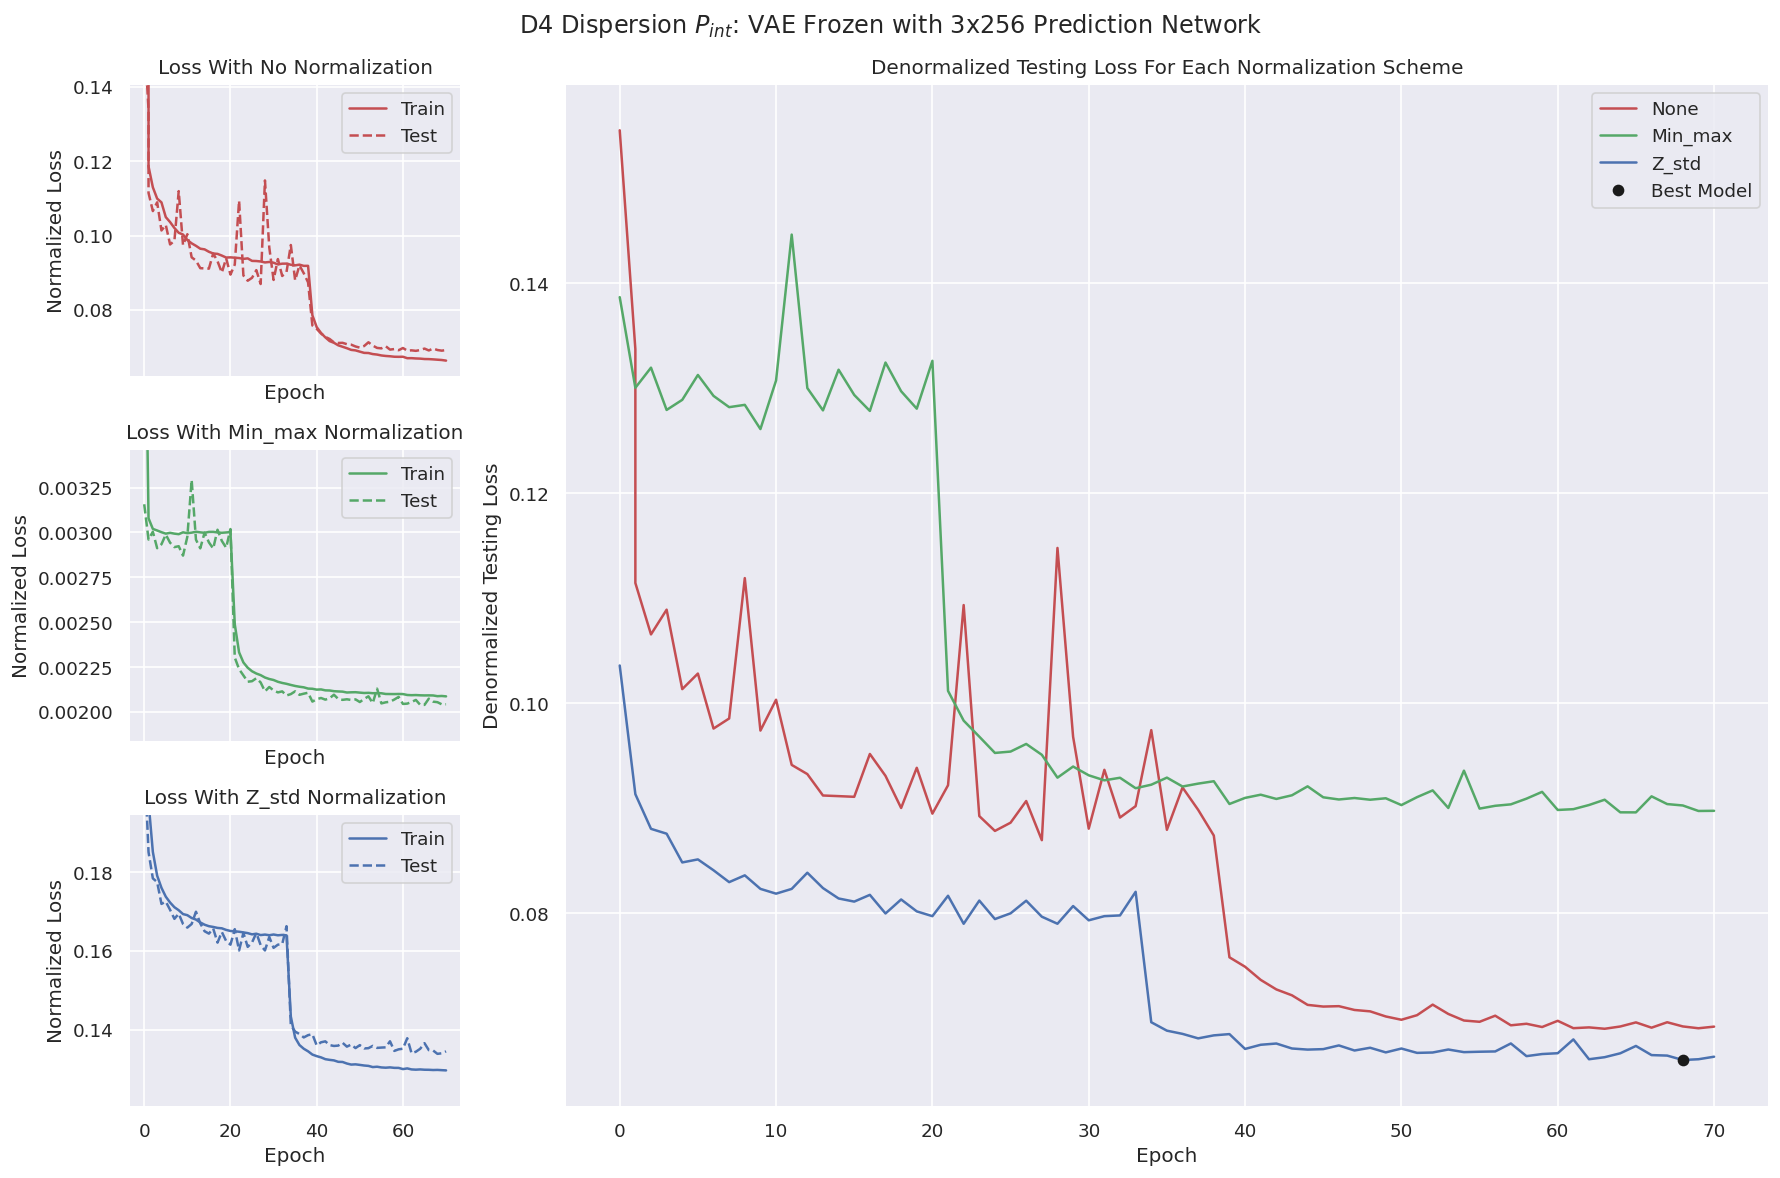

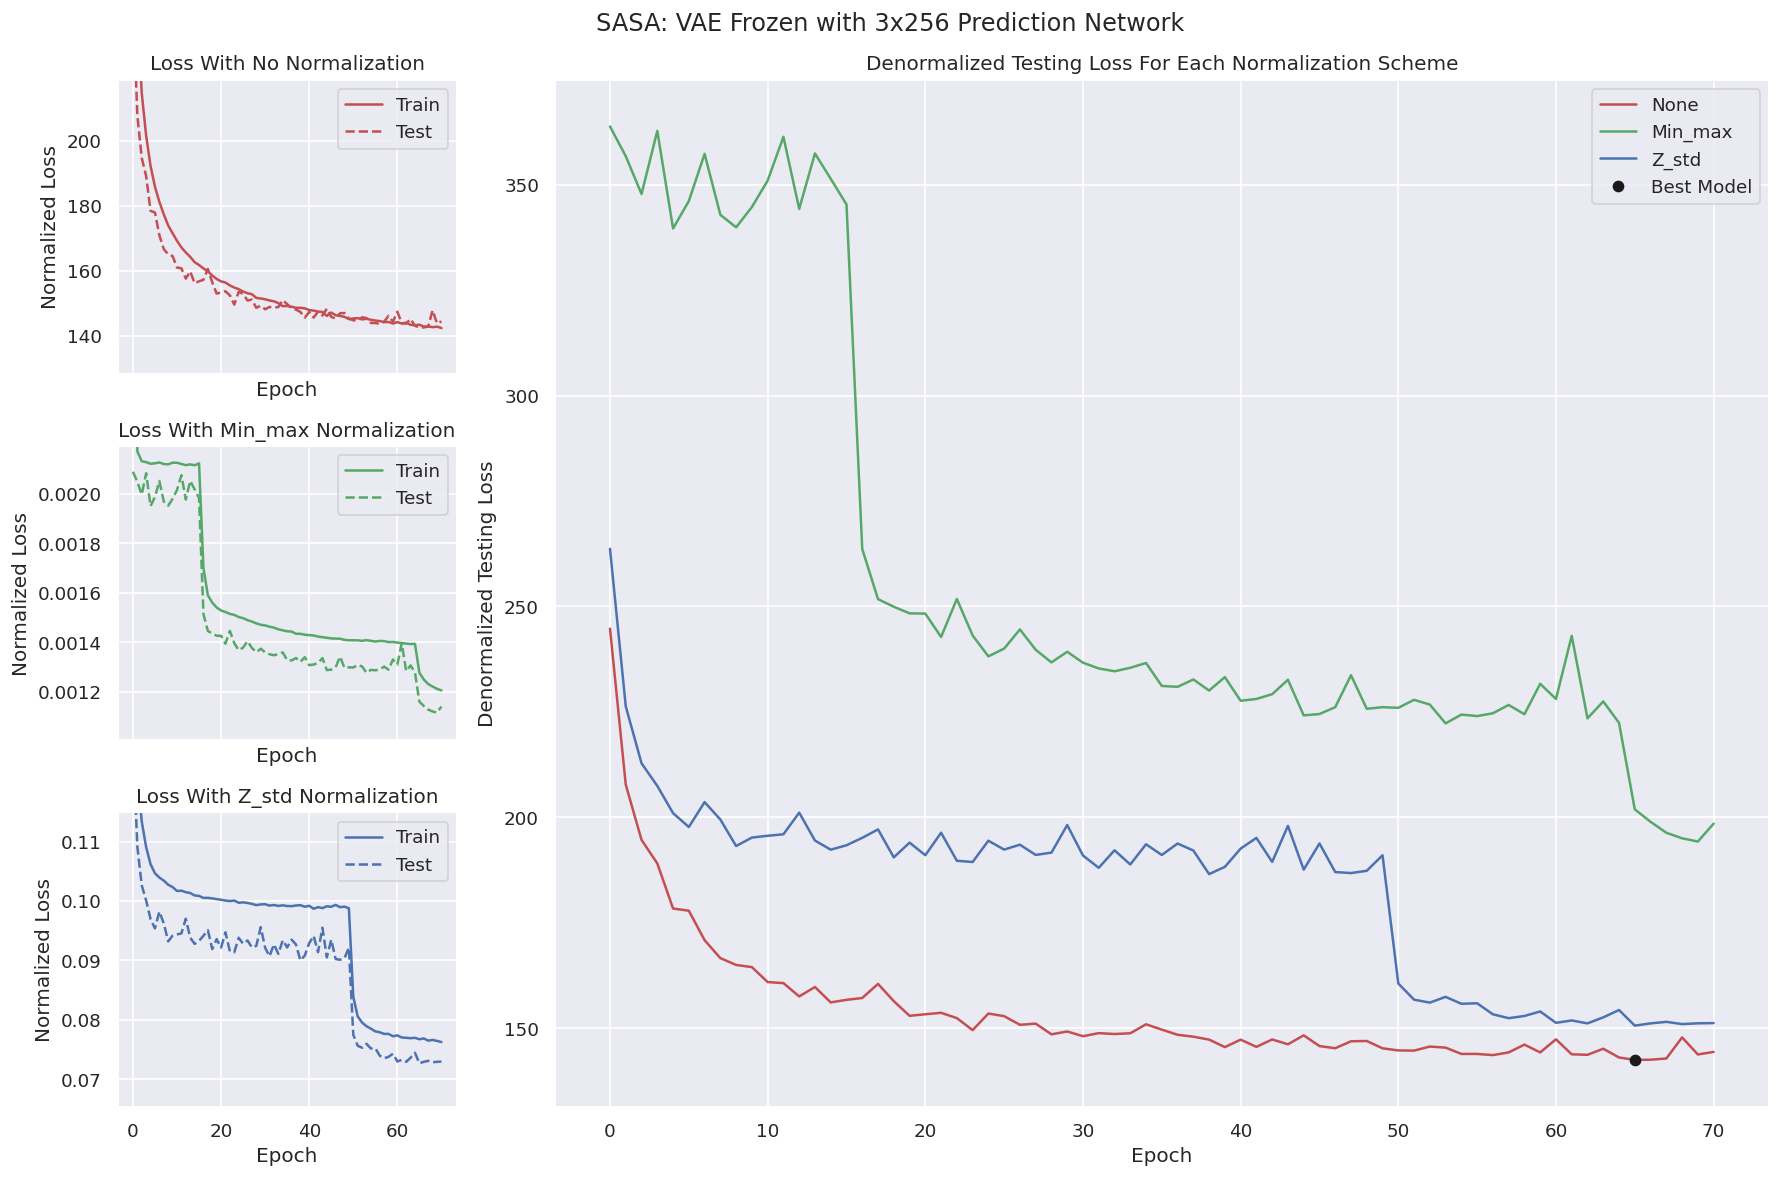

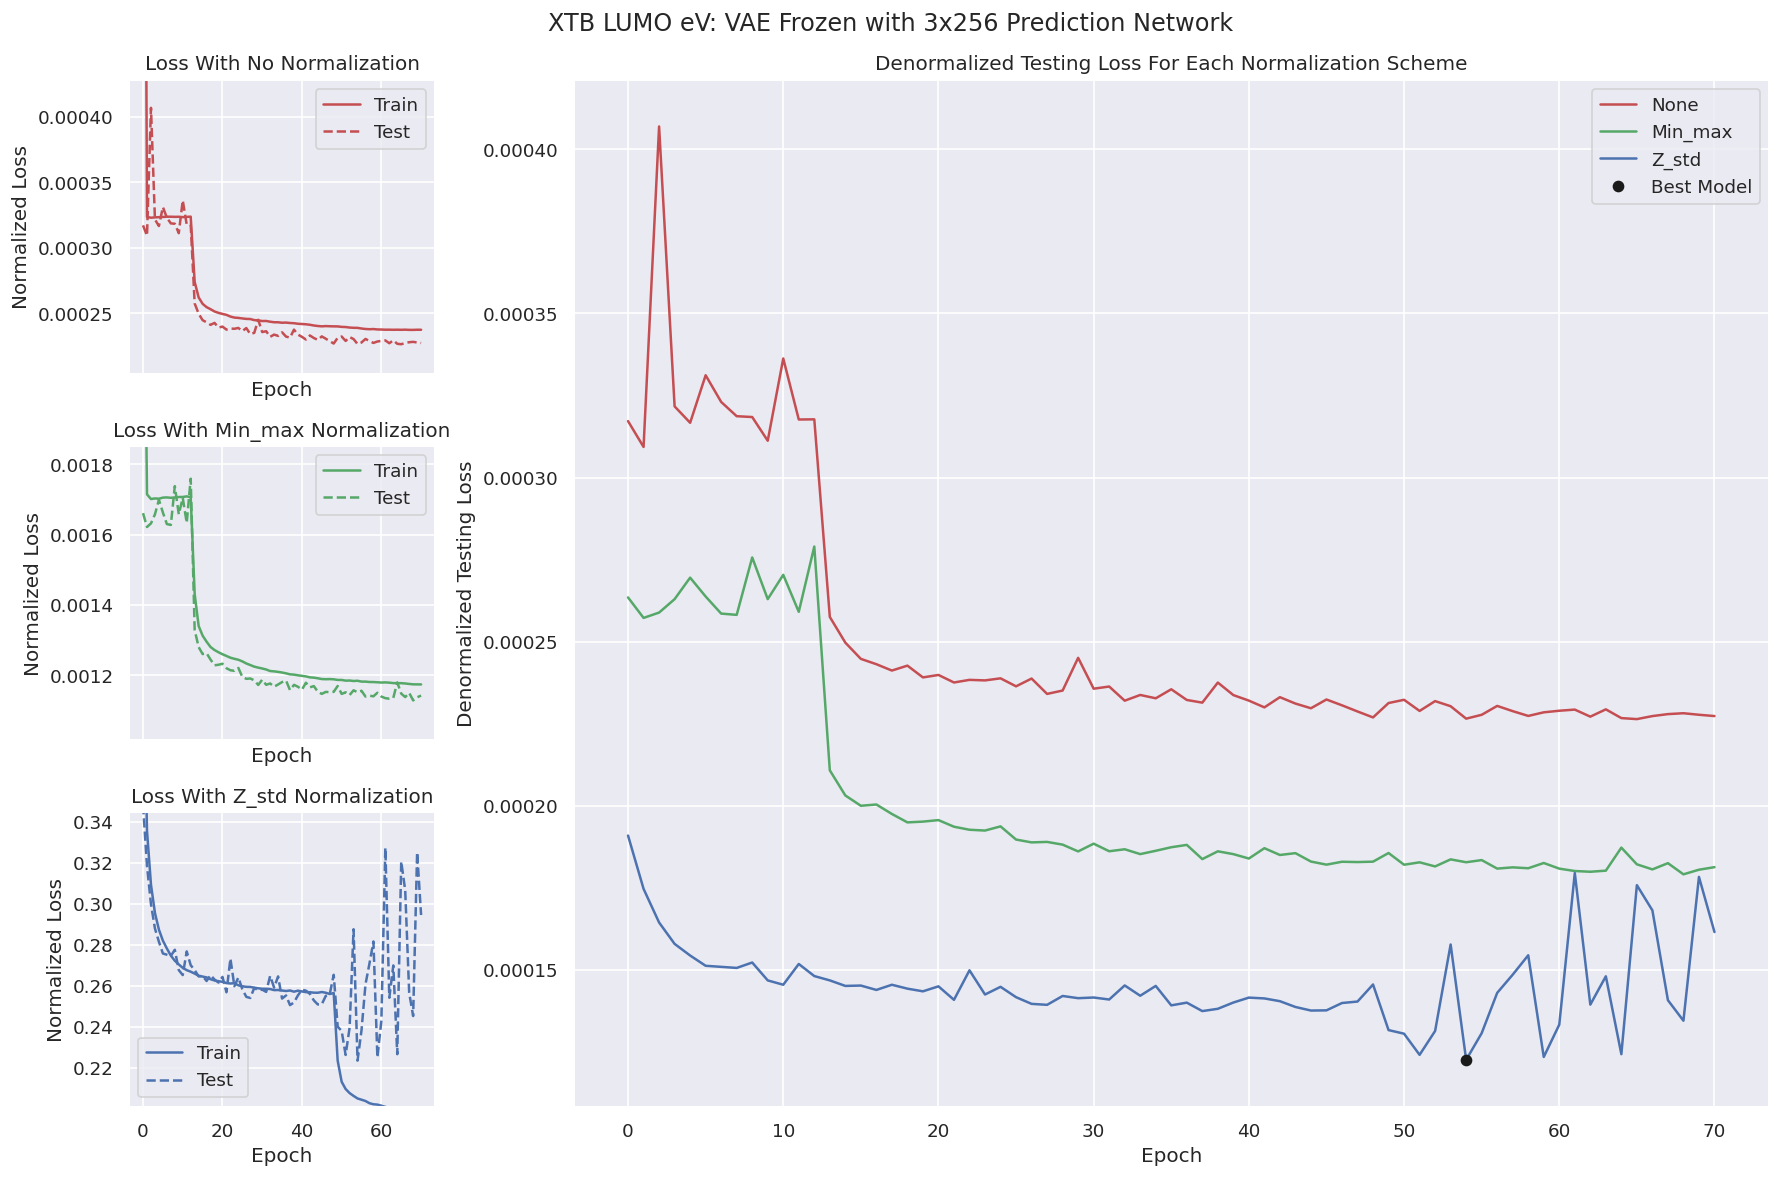

In [21]:
make_plot('D4 Dispersion $P_{int}$: VAE Frozen with 3x256 Prediction Network', 'd4_disp_pint_3x256*', 'd4_disp.svg')
make_plot('SASA: VAE Frozen with 3x256 Prediction Network', 'sasa_area_3x256*', 'sasa_area.svg')
make_plot('XTB LUMO eV: VAE Frozen with 3x256 Prediction Network', 'xtb_lumo_3x256*', 'xtb_lumo.svg')